In [1]:
import random
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
import time
from scipy import fft
from scipy import signal

In [2]:
path = r'D:\study\moed2\1lab\grace.jpg'

img = cv.imread(path)
print(img.shape)
img = img[:,:,2]
print(img.shape)

(360, 480, 3)
(360, 480)


In [3]:
def show_picture_plot(image, title: str='window_name'):
    try:
        plt.figure(figsize=(10,10))
        plt.title(title)
        plt.imshow(image, cmap='gray')
    except Exception :
        # cv.destroyAllWindows()
        print('error')

In [4]:
def show_picture(image, title: str='window_name'):
    try:
        cv.imshow(title, image)
        cv.waitKey(0)
        cv.destroyAllWindows()
    except Exception :
        cv.destroyAllWindows()
        print('error')

def show_picture_not_close(image, title: str='window_name'):
    try:
        cv.imshow(title, image)
        # cv.waitKey(0)
        # cv.destroyAllWindows()
    except Exception :
        cv.destroyAllWindows()
        print('error')

def inverse_image(image):
    if len(image.shape)==2:
        # start_time = time.time()
        image=np.array(image)
        x_len, y_len = image.shape[0], image.shape[1]
        vmax = np.max(image)

        new_image = vmax - (1) - image

        result = np.array(new_image)
        return result

In [5]:
def gray_image(image):
    mx = np.max(image)
    mn = np.min(image)
    amp = mx-mn
    img_restore_shift = (((image-mn)/amp)*255).astype('int')
    return img_restore_shift

In [6]:
def build_histogram(image):
    x_len, y_len = image.shape[0], image.shape[1]


    histogram = np.zeros(256)
    print(histogram.shape)
    for i in range(x_len):
        for e in range(y_len):
            histogram[image[i,e]]+=1
    mx = np.max(histogram)
    histogram = (histogram/mx)*255
    return histogram

def build_cdf(histogram):
    cdf = np.zeros(256)
    cdf[0] = histogram[0]
    for i in range(1, histogram.shape[0]):
        cdf[i]+=cdf[i-1]+histogram[i]
    mx = np.max(cdf)
    cdf = (cdf/mx)*255
    return cdf

In [42]:
from numpy import ndarray
from typing import Union
from random import randint


def fourier_transform_1d(vector, dt=None, in_complex=False):
    # start_time = time.time()
    N = len(vector)
    if dt:
        # dt = 1
        fgr = 1. / (dt * 2)
        print(fgr)
        df = (2. * fgr) / N
        print(df)
        gr = int(fgr / df)*2
        # data_new = vector.copy()[:int(fgr / df)]
        if in_complex:
            data_new = np.zeros(gr, np.csingle)
        else:
            data_new = np.zeros(gr, np.float)
        data_x_new = df * np.array(range(int(fgr / df)))


        data_np = np.array(vector)
    else:
        # data_new = np.zeros(N//2)
        gr = N
        if in_complex:
            data_new = np.zeros(gr, np.csingle)
        else:
            data_new = np.zeros(gr, np.float)
        data_x_new = np.array(range(N // 2))

        data_np = np.array(vector)

    '''Спектр высчитывается вручную'''
    for n in range(gr):
        # re = 0
        # im = 0
        # for k in range(N):
        #     re += image_vector[k] * math.cos((2 * math.pi * n * k) / N)
        #     im += image_vector[k] * math.sin((2 * math.pi * n * k) / N)
        '''Оптимизированный способ'''
        # re = np.sum(data_np * np.cos((2 * np.pi * n * np.arange(N)) / N))
        # im = np.sum(data_np * np.sin((2 * np.pi * n * np.arange(N)) / N))
        # re /= N
        # im /= N
        imre = np.sum(data_np*np.exp(2*(-1j)*np.pi*n*np.arange(N)/N))
        if in_complex:
            # data_new[n] = complex(re, im)
            data_new[n] = imre
        else:
            # data_new[n] = math.sqrt(re ** 2 + im ** 2)
            # data_new[n] = re + im
            data_new[n] = imre.real+imre.imag
    # print('elapsed', time.time() - start_time)

    # tmp = data_new[gr//2:]
    # data_new = np.array(list(tmp)+list(data_new[:gr//2]))

    return data_new

def fourier_transform_1d_back(complex_vector, dt=None):
    # start_time = time.time()
    N = len(complex_vector)
    if dt:
        # dt = 1
        fgr = 1. / (dt * 2)
        print(fgr)
        df = (2. * fgr) / N
        print(df)
        gr = int(fgr / df)*2
        data_new = np.zeros(gr, np.float)
        data_x_new = df * np.array(range(int(fgr / df)))
        data_np = np.array(complex_vector)
    else:
        gr = N
        data_new = np.zeros(gr)
        data_x_new = np.array(range(N // 2))

        data_np = np.array(complex_vector)

    '''Спектр высчитывается вручную'''
    for n in range(gr):
        # re = 0
        # im = 0
        # for k in range(N):
        #     re += image_vector[k] * math.cos((2 * math.pi * n * k) / N)
        #     im += image_vector[k] * math.sin((2 * math.pi * n * k) / N)

        '''Оптимизированный способ'''
        # re = np.sum(data_np * np.cos((2 * math.pi * n * np.arange(N)) / N))
        # im = np.sum(data_np * np.sin((2 * math.pi * n * np.arange(N)) / N))
        # re /= N
        # im /= N
        # data_new[n] = re + im

        imr = np.sum(data_np * np.exp(1j *2*dt * np.pi*n*np.arange(N))/N)
        data_new[n] = complex(imr).real+complex(imr).imag

    # print('elapsed', time.time() - start_time)
    return data_new

def diff_func(vector, dt=None):
    N = len(vector)
    diff = np.zeros(N)

    for i in range(N-1):
        if vector[i]==0:
            diff[i]=0
            continue
        if dt:
            diff[i] = (vector[i+1]-vector[i])/dt
        else:
            diff[i] = (vector[i+1]-vector[i])
    return diff

def fourier_transform_2d(matrix, dt=None, in_complex=False):
    # start_time = time.time()
    xl, yl = matrix.shape[0], matrix.shape[1]
    print(xl)
    if dt:
        fgr = 1. / (dt * 2)
        df = (2. * fgr) / yl
        gr = int(fgr / df)*2
        data_new = np.zeros(gr, np.csingle)
    else:
        gr = yl
        data_new = np.zeros(gr, np.csingle)

    '''Спектр высчитывается вручную'''
    # matrix_n = np.zeros((xl,yl),np.csingle)
    #
    # for ix in range(xl):
    #     for ey in range(yl):
    #         sm = 0
    #         for il in range(x):
    #             for el in range(y):
    #                 sm+=matrix[il,el]*np.exp(-1j*2*np.pi*((ix*il)/x+(ey*el)/y))
    #         matrix_n[ix,ey] = sm

    matrix_n = fft.fft2(matrix)

    return matrix_n

def fourier_transform_2d_back(matrix, dt=None, in_complex=False):
    # start_time = time.time()
    xl, yl = matrix.shape[0], matrix.shape[1]
    print(xl)
    if dt:
        fgr = 1. / (dt * 2)
        df = (2. * fgr) / yl
        gr = int(fgr / df)*2
    else:
        gr = yl

    '''высчитывается вручную'''
    # matrix_n = np.zeros((xl,yl),np.csingle)
    #
    # for ix in range(xl):
    #     for ey in range(yl):
    #         sm = 0
    #         for il in range(x):
    #             for el in range(y):
    #                 sm+=matrix[il,el]*np.exp(1j*2*np.pi*((ix*il)/x+(ey*el)/y))
    #         matrix_n[ix,ey] = sm

    matrix_n = fft.ifft2(matrix)

    return matrix_n

def show_plot(func, x=None,  title = 'title'):
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.grid()
    if x is not None:
        plt.plot(x, func)
    else:
        plt.plot(func)

def show_plots(funcs, x=None,  title = 'title'):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)
    plt.title(title)
    plt.grid()
    for i in range(len(funcs)):
        if x is not None:
            ax.plot(x, funcs[i])
        else:
            ax.plot(funcs[i])

def gamma_transform_image(image, C: float, gamma: float):
    # try:
    # print('here')
    new_image = []
    if len(image.shape)==2:
        # start_time = time.time()
        image=np.array(image)
        x_len, y_len = image.shape[0], image.shape[1]
        # print(image[:10])
        new_image = C * (image ** gamma)
        # print(new_image[:10])

        result = np.array(new_image)
        # result = np.array(new_image)
        # print('time', time.time()-start_time)
        # print('orig shape', result.shape)
        return result

    # except Exception:
    #     cv.destroyAllWindows()
    #     print('error')

def autocorrelation_vector(vector):
    n = vector.shape[0]
    av = np.average(vector)
    vector_av = vector-av
    new_vector = []
    for lp in range(n):
        sm = 0
        for i in range(n-lp-1):
            sm+=vector_av[i]*vector_av[i+lp]
        new_vector.append(sm/n)
    return np.array(new_vector)

def correlation_vector(vector, vector2):
    n = vector.shape[0]
    av = np.average(vector)
    av2 = np.average(vector2)
    vector_av = vector-av
    vector2_av = vector2-av2
    new_vector = []
    for lp in range(n):
        sm = 0
        for i in range(n-lp-1):
            sm+=vector_av[i]*vector2_av[i+lp]
        new_vector.append(sm/n)
    return np.array(new_vector)

def convolution(vector1, vector2):
    """
    Функция свёртки

    :param
    :return:
    """
    M = len(vector1)
    N = len(vector2)

    # data_new = np.zeros(N+M)
    #
    # for k in range(N+M):
    #     sm = 0
    #     for j in range(M):
    #         if k-j < 0:
    #             sm += func.data[k - j] * self.data[j]
    #             continue
    #         if k-j>=N:
    #             sm += func.data[(k - j)%N] * self.data[j]
    #             continue
    #         sm += func.data[(k - j) % N] * self.data[j]
    #     data_new[k] = sm
    #
    # data_new = data_new[M//2:-M//2]
    # data_x_new = np.array(range(N))

    '''с помощью библиотеки'''
    data_new = signal.convolve(vector1, vector2, mode='same')
    # data_new = np.convolve(self.data, func.data, mode='full')
    # data_x_new = np.arange(len(data_new))

    return data_new

def normilize(vector, vl=None):
    mx = vl
    if vl is None:
        mx = np.max(vector)
    vector/=mx
    return vector

class Filter:
    """Цифровые фильтры частот"""

    @staticmethod
    def lpf(fc, dt, m) -> list:
        data = []
        m: int = m
        fc: float = fc
        dt: float = dt

        d = [0.35577019, 0.2436983, 0.07211497, 0.00630165]
        # rectangular part weights
        fact = 2 * fc * dt
        arg = fact * np.pi
        data = np.sin(arg * np.array(range(1, m + 1))) / np.array(np.array(range(1, m + 1)) * np.pi)
        data = list(data)
        data.insert(0, fact)

        # trapezoid smoothing in the end
        data[m] /= 2.
        #
        # # P310 smoothing window
        sumg = data[0]
        for i in range(1, m + 1):
            sum = d[0]
            arg = np.pi * i / m
            for k in range(1, 4):
                sum += 2. * d[k] * np.cos(arg * k)
            data[i] *= sum
            sumg += 2 * data[i]

        for i in range(m + 1):
            data[i] /= sumg

        sym_data = data[:0:-1]
        data = sym_data + data

        return data

    @staticmethod
    def hpf(fc, dt, m) -> list:
        data = []
        lpw = Filter.lpf(fc, dt, m)
        mmax = max(lpw)
        for i in range(2*m+1):
            val = 1.-lpw[i] if i == m else -lpw[i]
            data.append(val)

        return data

    @staticmethod
    def bpf(fc1, fc2, dt, m) -> list:
        data = []
        lpw1 = Filter.lpf(fc1, dt, m)
        lpw2 = Filter.lpf(fc2, dt, m)
        if fc1 >= fc2:
            raise Exception('fc1 must be less then fc2')
        for i in range(2 * m + 1):
            data.append(lpw2[i]-lpw1[i])

        return data

    @staticmethod
    def bsf(fc1, fc2, dt, m) -> list:
        data = []
        lpw1 = Filter.lpf(fc1, dt, m)
        lpw2 = Filter.lpf(fc2, dt, m)
        if fc1 >= fc2:
            raise Exception('fc1 must be less then fc2')
        for i in range(2 * m + 1):
            val = 1. + lpw1[i] - lpw2[i] if i == m else lpw1[i] - lpw2[i]
            data.append(val)

        return data

def generate_salt_noise(form:Union[tuple, ndarray], n, val, d=10):
    if isinstance(form, tuple):
        x, y = form[0], form[1]
        image = np.zeros((x,y))
    else:
        x, y = form.shape[0], form.shape[1]
        image = np.array(form, 'int')
    rng = np.arange(x)
    for i in range(x):
        nn = randint(0,n)
        pos = random.sample(range(y), int(nn))
        image[i, pos] += randint(val-d, val+d)
    return image.astype('int')

def generate_salt_noise2(form:Union[tuple, ndarray], n, val, d=10):
    if isinstance(form, tuple):
        x, y = form[0], form[1]
        image = np.zeros((x,y))
    else:
        x, y = form.shape[0], form.shape[1]
        image = np.array(form, 'int')
    rng = np.arange(x)

    for i in range(x):
        nn = randint(0,n)
        pos = random.sample(range(y), int(nn))
        image[i, pos] += randint(val-d, val+d)
    for i in range(y):
        nn = randint(0,n)
        pos = random.sample(range(x), int(nn))
        image[pos, i] += randint(val-d, val+d)
    return image.astype('int')

def generate_pepper_noise(form:Union[tuple, ndarray], n, val, d=10):
    if isinstance(form, tuple):
        x, y = form[0], form[1]
        image = np.zeros((x,y))
    else:
        x, y = form.shape[0], form.shape[1]
        image = np.array(form, 'int')
    rng = np.arange(x)
    for i in range(x):
        nn = randint(0,n)
        pos = random.sample(range(y), int(nn))
        image[i, pos] -= randint(val-d, val+d)
        image[image<0] = 0
    return image.astype('int')

def generate_pepper_noise2(form:Union[tuple, ndarray], n, val, d=10):
    if isinstance(form, tuple):
        x, y = form[0], form[1]
        image = np.zeros((x,y))
    else:
        x, y = form.shape[0], form.shape[1]
        image = np.array(form, 'int')
    rng = np.arange(x)

    for i in range(x):
        nn = randint(0,n)
        pos = random.sample(range(y), int(nn))
        image[i, pos] -= randint(val-d, val+d)

    for i in range(y):
        nn = randint(0,n)
        pos = random.sample(range(x), int(nn))
        image[pos, i] -= randint(val-d, val+d)

    # image[image<0] = 0
    return image.astype('int')

def generate_random_noise2(form:Union[tuple, ndarray], mn=0, mx=0):
    if isinstance(form, tuple):
        x, y = form[0], form[1]
        image = np.random.random(size=(x,y)) * (mx - mn) + mn
    else:
        x, y = form.shape[0], form.shape[1]
        image = np.array(form, 'int')
        image+=np.array(np.random.random(size=(x,y)) * (mx - mn) + mn, 'int')

    return np.array(image, 'int')

def avg_filter_clear(image, shape):
    image_c = np.array(image)
    image_c2 = np.array(image)

    dx = 0
    dy = 0

    lx,ly = image.shape

    mx, my = shape[0]//2, shape[1]//2

    for i in range(lx):
        for e in range(ly):
            le = i-mx if i-mx >= 0 else 0
            lr = i+mx if i+mx < lx else lx
            re = e-my if e-my >= 0 else 0
            rr = e+my if e+my < ly else ly
            image_c2[i, e] = np.average(image_c[le:lr,re:rr])
    return image_c2

def mean_filter_clear(image, shape):
    image_c = np.array(image)
    image_c2 = np.array(image)

    dx = 0
    dy = 0

    lx,ly = image.shape

    mx, my = shape[0]//2, shape[1]//2

    for i in range(lx):
        for e in range(ly):
            le = i-mx if i-mx >= 0 else 0
            lr = i+mx if i+mx < lx else lx
            re = e-my if e-my >= 0 else 0
            rr = e+my if e+my < ly else ly
            image_c2[i, e] = np.median(image_c[le:lr,re:rr])
    return image_c2

(360, 480)


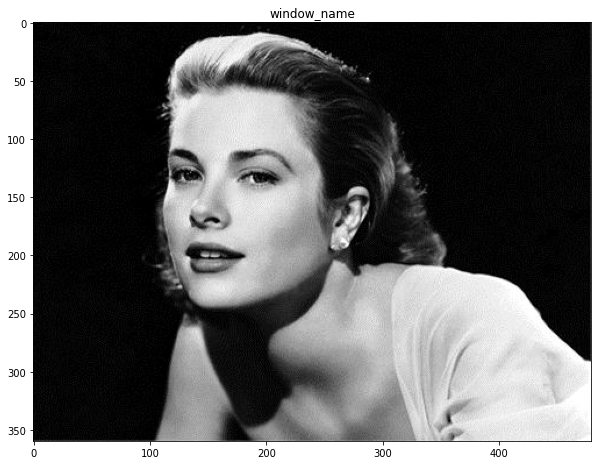

In [8]:
show_picture_plot(img)
print(img.shape)

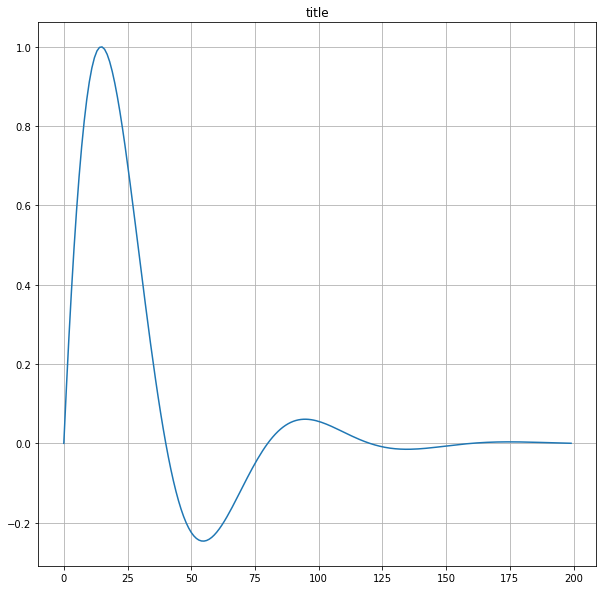

In [88]:
f1 = 2.5
n=200
a1=7
dt=0.005
impls = np.sin(2 * np.pi * f1 * np.array(range(n)) * dt) * np.exp(-a1 * np.array(range(n)) * dt)
mx = np.max(impls)
impls /= mx

show_plot(impls)

100.0
1.0


C:\Users\ACER\AppData\Local\Temp\ipykernel_6108\4132047538.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_new = np.zeros(gr, np.float)


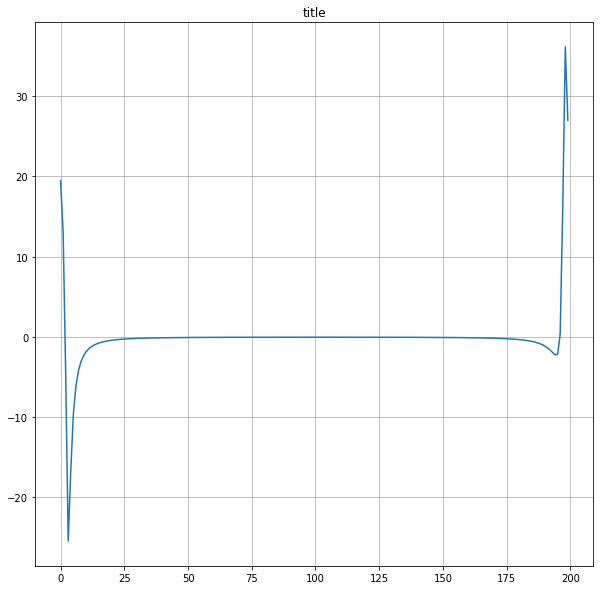

In [89]:
impls_f = fourier_transform_1d(impls, dt)

show_plot(impls_f)

d:\programms\pycharm 2021.2\venvs\moed2\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
d:\programms\pycharm 2021.2\venvs\moed2\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


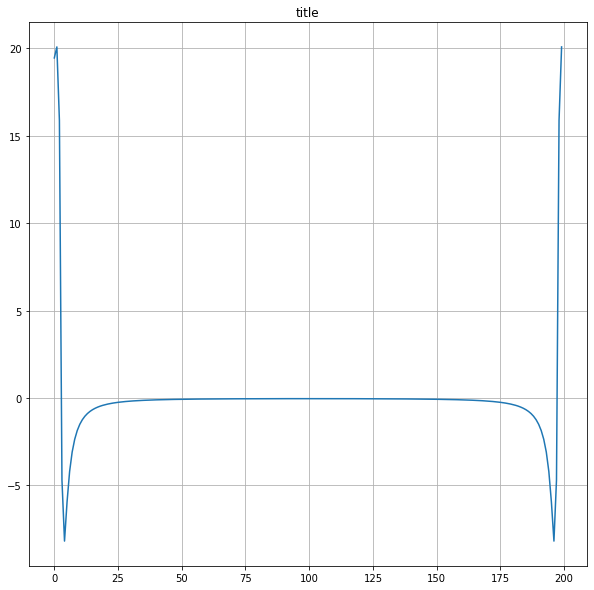

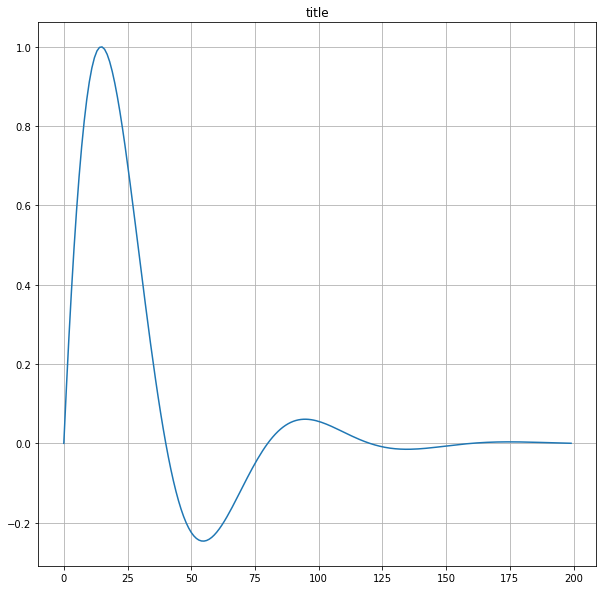

In [16]:
impls_f = fft.fft(impls)
tmp2 = fft.ifft(impls_f)
show_plot(impls_f)
show_plot(tmp2)

100.0
1.0
100.0
1.0


C:\Users\ACER\AppData\Local\Temp\ipykernel_6108\2019872033.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  impls_fc_f = np.asarray(impls_fc, float)
C:\Users\ACER\AppData\Local\Temp\ipykernel_6108\4132047538.py:73: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_new = np.zeros(gr, np.float)


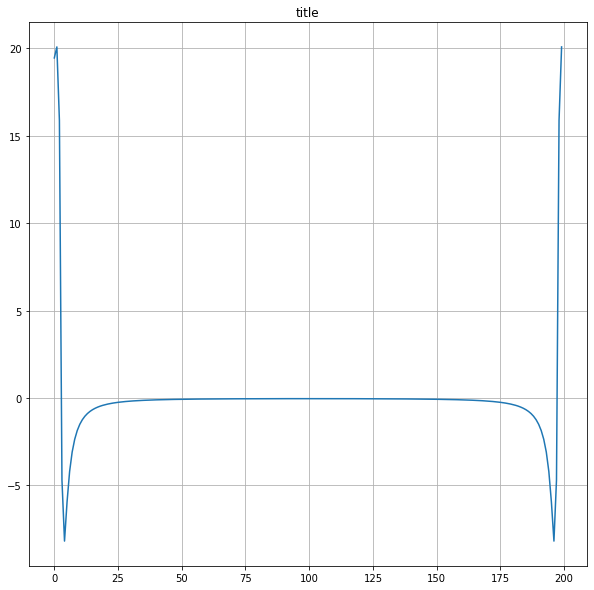

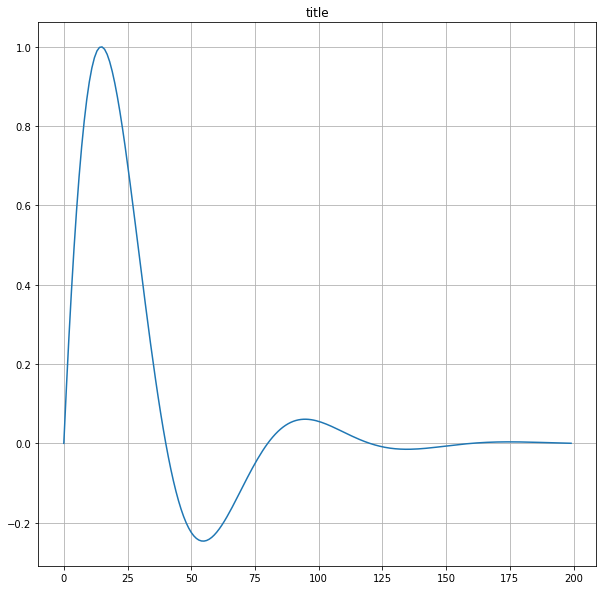

In [92]:
impls_fc = fourier_transform_1d(impls, dt, True)
impls_fc_f = np.asarray(impls_fc, float)
impls_fc_r = fourier_transform_1d_back(impls_fc, dt)
# impls_fc_r =
show_plot(impls_fc_f)
show_plot(impls_fc_r)

In [44]:
img_f = fourier_transform_2d(img)
img_f_r =fourier_transform_2d_back(img_f)

360
360


C:\Users\ACER\AppData\Local\Temp\ipykernel_9916\1467923772.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  img_f_f = np.asarray(img_f,float)
C:\Users\ACER\AppData\Local\Temp\ipykernel_9916\1467923772.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  img_f_r_f = np.asarray(img_f_r,float)


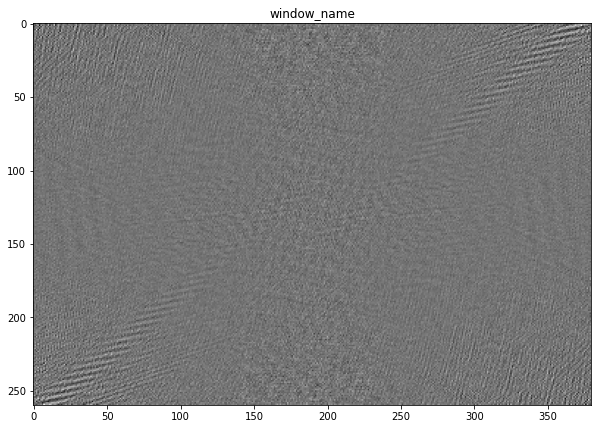

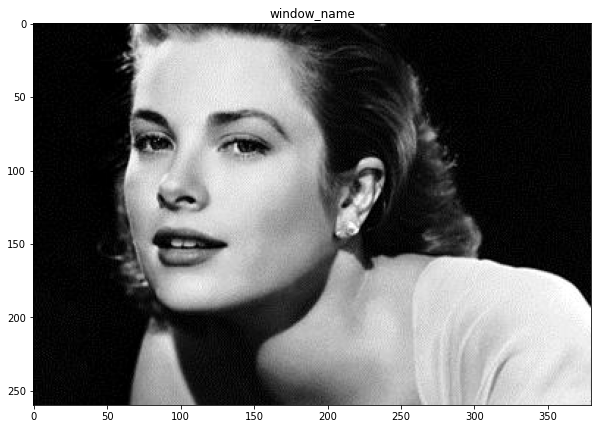

In [45]:
img_f_f = np.asarray(img_f,float)
x,y = img_f_f.shape
show_picture_plot(img_f_f[50:x-50,50:y-50])

img_f_r_f = np.asarray(img_f_r,float)
x,y = img_f_r_f.shape
show_picture_plot(img_f_r_f[50:x-50,50:y-50])

C:\Users\ACER\AppData\Local\Temp\ipykernel_6108\4259041311.py:31: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_new = np.zeros(gr, np.float)


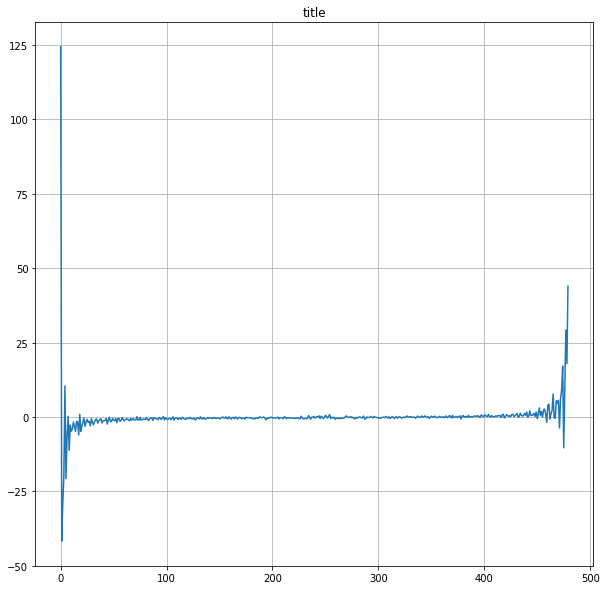

In [33]:
line_f = fourier_transform_1d(img[330])
show_plot(line_f)

C:\Users\ACER\AppData\Local\Temp\ipykernel_6108\456138236.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp = np.asarray(tmp,float)


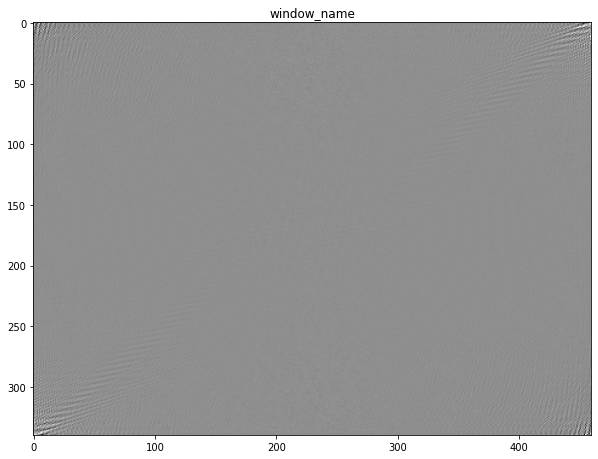

In [59]:
tmp = fft.fft2(img)
tmp = np.asarray(tmp,float)
x,y = tmp.shape
show_picture_plot(tmp[10:x-10,10:y-10])

In [19]:
mtrx = np.zeros((3,3))
mtrx[0,0] = 1
mtrx[0,2] = 2
mtrx[2,0] = 3

print(mtrx)

print(mtrx[0])
print(mtrx[:,0])

[[1. 0. 2.]
 [0. 0. 0.]
 [3. 0. 0.]]
[1. 0. 2.]
[1. 0. 3.]


In [30]:
tmp = np.arange(5)
tmpx = []
for i in range(5):
    tmpx.append(tmp*i)
tmpx = np.asarray(tmpx)
n = tmp.shape[0]
x,y = tmpx.shape
dx=1
print(tmp)
print(tmpx)
tmpx2 = np.zeros((x,y), np.csingle)
# tmp2 = np.zeros(n, np.csingle)
#
# for i in range(n):
#     tmp2[i] = np.sum(tmp*np.exp(-1j*2*np.pi*i*np.arange(n)/n))
# # tmpx2 = tmpx*np.exp(-1j*2*np.pi*dx)/n
# tmp3 = fourier_transform_1d(tmp, 1,True)
# tmp4 = fft.fft(tmp)
# print(tmp2)
# print(tmp3)
# print(tmp4)
# mtrx = np.zeros((x,y))
for ix in range(x):
    for ey in range(y):
        sm = 0
        for il in range(x):
            for el in range(y):
                sm+=tmpx[il,el]*np.exp(-1j*2*np.pi*((ix*il)/x+(ey*el)/y))
        tmpx2[ix,ey] = sm
# for i in range(x):
#     for e in range(y):
#         tmpx2[i,e] = np.sum(tmpx*np.exp(-1j*2*np.pi*mtrx))

print(tmpx2)
tmpx3 =fft.fft2(tmpx)
print(tmpx3)

[0 1 2 3 4]
[[ 0  0  0  0  0]
 [ 0  1  2  3  4]
 [ 0  2  4  6  8]
 [ 0  3  6  9 12]
 [ 0  4  8 12 16]]
[[100.      +0.0000000e+00j -25.      +3.4409550e+01j
  -25.      +8.1229925e+00j -25.      -8.1229925e+00j
  -25.      -3.4409550e+01j]
 [-25.      +3.4409550e+01j  -5.59017 -1.7204775e+01j
    3.454915-1.0633135e+01j   9.045085-6.5716391e+00j
   18.09017 +4.0544475e-14j]
 [-25.      +8.1229925e+00j   3.454915-1.0633135e+01j
    5.59017 -4.0614963e+00j   6.90983 +5.9055162e-15j
    9.045085+6.5716391e+00j]
 [-25.      -8.1229925e+00j   9.045085-6.5716391e+00j
    6.90983 +5.0173378e-15j   5.59017 +4.0614963e+00j
    3.454915+1.0633135e+01j]
 [-25.      -3.4409550e+01j  18.09017 +3.6991762e-14j
    9.045085+6.5716391e+00j   3.454915+1.0633135e+01j
   -5.59017 +1.7204775e+01j]]
[[100.        -0.00000000e+00j -25.        +3.44095480e+01j
  -25.        +8.12299241e+00j -25.        -8.12299241e+00j
  -25.        -3.44095480e+01j]
 [-25.        +3.44095480e+01j  -5.59016994-1.72047740e+01j

In [ ]:
x,y = img.shape
lines = np.zeros(x)
for i in range(x):
    lines[i] = fft.fft(img[i])

In [ ]:
x,y = img.shape
lines = np.zeros(x)
for i in range(x):
    # tmp2 = np.zeros(y, np.csingle)
    # for e in range(y):
    #     tmp2[e] = np.sum(img[i]*np.exp(-1j*2*np.pi*e*np.arange(y)/y))
    # l1 = fourier_transform_1d(img[i],1, True)
    # lines[i] = tmp2
    # l1_f = np.asarray(l1, float)
    lines[i] = fft.fft(img[i])

# show_plot(l1)

In [ ]:
x,y = img.shape
lines = np.zeros(x)
for i in range(x):
    # tmp2 = np.zeros(y, np.csingle)
    # for e in range(y):
    #     tmp2[e] = np.sum(img[i]*np.exp(-1j*2*np.pi*e*np.arange(y)/y))
    # l1 = fourier_transform_1d(img[i],1, True)
    # lines[i] = tmp2
    # l1_f = np.asarray(l1, float)
    lines[i] = fft.fft(img[i])

ERROR! Session/line number was not unique inerror
 database. History logging moved to new session 1066


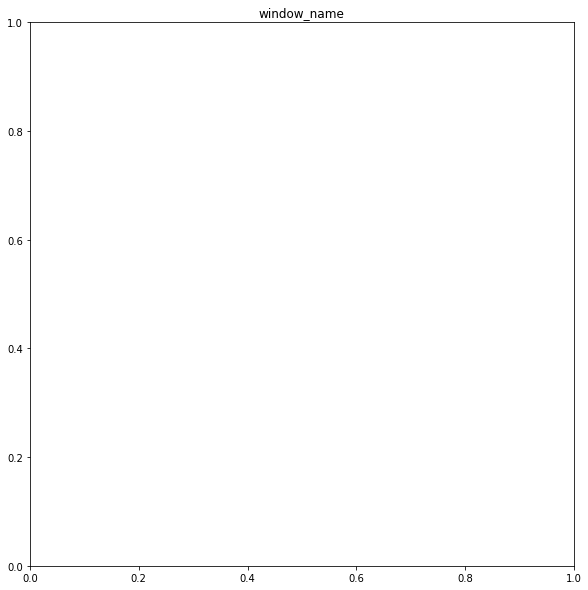

In [17]:
show_picture_plot(lines)